<h1>Project Description:</h1><br>
Our main aim is to evaluate the best possible marketing campaign for promoting sales of a new product.<br>
We are analyzing the results of an AB test. We have incorporated the statistical test(T-test) to ensure the results are statistically significant.<br>
Steps incorporated - Data ingestion and exploration --> Data Visualization --> Statistical Analysis

# Import Statements

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

# Reading & Exploratory Data Analysis

In [14]:
df=pd.read_excel(r"C:\Users\sidha\Desktop\proj\AB_testing_adcampaigns.xlsx")
df.head(10)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


<b>Null value check

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


<b> Exploring the summary statistics

In [19]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


<b>Exploring possible values that the various fields can take

In [20]:
print("Market ID")
print(df['MarketID'].unique())
print("Market Size")
print(df['MarketSize'].unique())
print("Location ID")
print(df['LocationID'].unique())
print("Age of store")
print(df['AgeOfStore'].unique())
print("Promotion")
print(df['Promotion'].unique())
print("Week")
print(df['week'].unique())


Market ID
[ 1  2  3  4  5  6  7  8  9 10]
Market Size
['Medium' 'Small' 'Large']
Location ID
[  1   2   3   4   5   6   7   8   9  10  11  12  13 101 102 103 104 105
 106 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 301 302 303 304 305 306 307 308 309 401 402 403 404
 405 406 407 408 409 410 411 412 413 414 415 501 502 503 504 505 506 507
 508 509 510 511 512 513 514 515 601 602 603 604 605 606 607 608 609 610
 611 612 613 614 615 701 702 703 704 705 706 707 708 709 710 711 712 801
 802 803 804 805 806 807 808 809 810 901 902 903 904 905 906 907 908 909
 910 911 912 913 914 915 916 917 918 919 920]
Age of store
[ 4  5 12  1 10 15  6 22  8 19 11 13  3  7  2 23  9 28 25 14 24 18 27 17
 20]
Promotion
[3 2 1]
Week
[1 2 3 4]


<b>Computing the locations involved in the AB testing

In [24]:
print(len(df['LocationID'].unique()))

137


<b>Based on preliminary analysis, we can say that:</b><br>
1: 3 promotional campaigns were run<br>
2: These campaigns were run in a matter of 4 weeks<br>
3: These campaigns were run across 137 locations<br>
4: These campaigns were run at both old and new stores<br>
5: These campigns were run irrespective of market sizes across 10 markets<br>

# Data Visualization - Exploratory Data Analysis

<b>Sales results for the promotions

([<matplotlib.patches.Wedge at 0x1d8734e44f0>,
 [Text(0.5506415505003871, 1.0096008532397986, 'Promotion 1'),
  Text(-1.1488589728849177, 0.05121582198707841, 'promotions 2'),
  Text(0.5051321291809575, -1.03312222513559, 'Promotions 3')],
 [Text(0.3112321807176101, 0.5706439605268427, '34%'),
  Text(-0.6493550716306056, 0.02894807329704431, '30%'),
  Text(0.2855094643196716, -0.5839386489896812, '36%')])

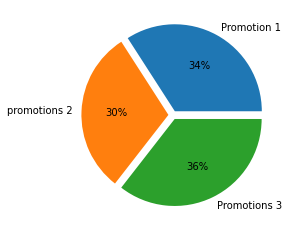

In [38]:
data=df.groupby("Promotion")["SalesInThousands"].sum()
plt.pie(x=data,explode=[0.05]*3,labels=["Promotion 1","promotions 2","Promotions 3"],autopct="%1.0f%%")

<b>Based on the inital look, promotion 3 looks to be the best performing promotion followed by promotion 1 and promotion 2 respectively

In [68]:
data=df.groupby(['Promotion','MarketSize']).count()["MarketID"]
data

Promotion  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: MarketID, dtype: int64

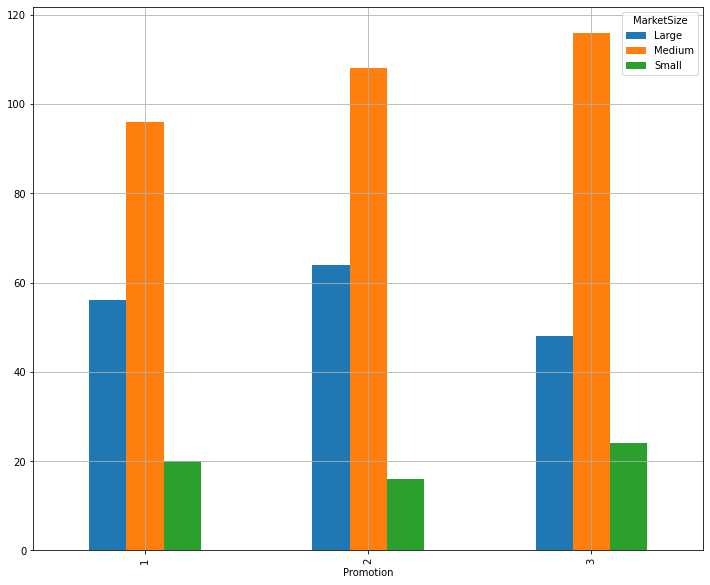

In [70]:
data=df.groupby(['Promotion','MarketSize']).count()["MarketID"].unstack('MarketSize').plot(kind='bar',figsize=(12,10),grid=True)

<b>Based on the above diagram we can infer that the promotions were generally run across medium market size followed by large market size. This could be due to a number of reason, one of them could be the presence of medium sized stores more  in number in the areas of promotion as compared to the other store types. This should be definitely looked upon if we have additional data of the stores in the areas where promotion was run.

<AxesSubplot:xlabel='AgeOfStore'>

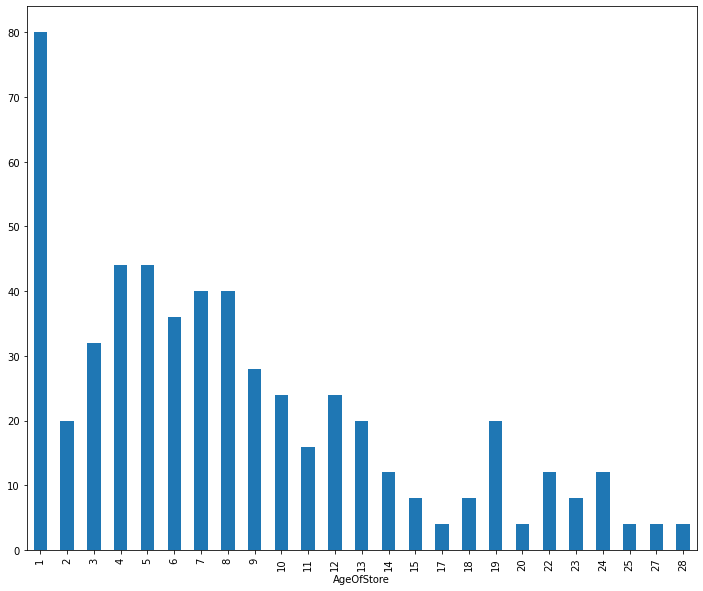

In [84]:
data=df.groupby(['AgeOfStore']).count()['MarketID']
data.plot(kind='bar',figsize=(12,10))

<b>Based on the age of store, there looks like there was a preference for stores formed in the recent years as compared to more older stores, this can be attributed to a number of reasons.

<AxesSubplot:ylabel='AgeOfStore'>

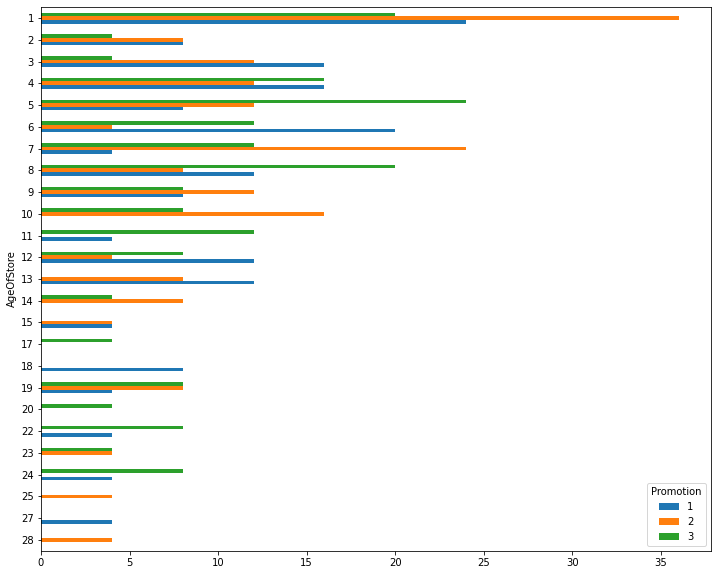

In [95]:
df.groupby(['AgeOfStore','Promotion']).count()["MarketID"].unstack('Promotion').iloc[::-1].plot(kind='barh',figsize=(12,10))

In [97]:
df.groupby("Promotion").describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


<b>Base on the means, we can see that promotions were run across similar stores.

# Result Analysis of A/B Testing

<b>Comparing Promotion 1 and promotion 2

In [98]:
means=df.groupby("Promotion").mean()['SalesInThousands']
stds=df.groupby("Promotion").std()['SalesInThousands']
counts=df.groupby("Promotion").count()['SalesInThousands']

In [99]:
means

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

In [100]:
stds

Promotion
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64

In [101]:
counts

Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64

<b>Comparing promotion 1 and promotion 3

In [113]:
promotion1=df[df['Promotion']==1]["SalesInThousands"].values
promotion2=df[df['Promotion']==2]["SalesInThousands"].values
promotion3=df[df['Promotion']==3]["SalesInThousands"].values

In [111]:
t,p=stats.ttest_ind(promotion1,promotion2)

In [112]:
print(t)
print(p)

6.453671702181005
3.5506696512134566e-10


In [114]:
t,p=stats.ttest_ind(promotion1,promotion3)

In [115]:
print(t)
print(p)

1.5551383687293547
0.12079667272313273


<b>Based on the reuslts of the t-test we can say that promotion 1 performs better than promotion 2. This result is statistically significant. Between promtion 1 and promotion 3 there does not seem to be any statistically different results, i.e. the difference in means observed could be due to the sample used rather and no comments about the population can be made